In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## PDAP2016 - Lecture 10

# Plotting Maps

There are two different ways of plotting maps with *matplotlib*, [Basemap](http://matplotlib.org/basemap/) and [Cartopy](http://scitools.org.uk/cartopy/docs/latest/).  Here, we will use *Basemap*.

In [2]:
from mpl_toolkits.basemap import Basemap

For plotting a map, we need to create a `Basemap` instance:

In [ ]:
my_map = Basemap(projection='ortho', lat_0=53., lon_0=8.,
                 resolution='c', area_thresh=1000.0)
my_map.drawcoastlines()

## Adding more detail to the map

Now, draw the country borders, and give some color to the land masses.  Add the following lines after the `drawcoastlines()` call:

    my_map.drawcountries()
    my_map.fillcontinents(color='gray')

Also, you can add a proper boundary to the globe, by adding the line

    my_map.drawmapboundary()

Now, let's add some latitude / longitude lines:

    my_map.drawmeridians(np.arange(0, 360, 30))
    my_map.drawparallels(np.arange(-90, 90, 30))
    
The two functions each take an array of longitude / latitude values (in degrees) as argument.

## Choosing a map projection

Basemap supports a very large number of different map projections; a list of these is available here:  http://matplotlib.org/basemap/users/mapsetup.html.

For example, change the projection to the *Mollweide* projection.  You can do this by changing the `projection` argument to `moll`:

    my_map = Basemap(projection='moll', lat_0=53, lon_0=8,
                     resolution='l')

### Exercise
Browse through the available map projections, and create a map in your favorite one.

## Selecting a region for the map

Maybe you want to zoom in to a specific region, say, Northern Germany.  Not all projections support this, but *Mercator* does.  You can specify the map extens using the `llcrnrlon`, `llcrnrlat`, `urcrnrlon`, and `urcrnrlat` arguments.  (`llcrnr` and `urcrnr` stand for *lower left* and *upper right* corner, respectively).

### Exercise
Plot a map of Northern Germany.

**Hint:** Bremen is located at 53.08°N, 8.81°E

**Hint:** If the coastlines are too coarse, and the map looks ugly, try a different `resolution` argument.  Valid choices are `c` (crude), `l` (low), `i` (intermediate), `h` (high), `f` (full). *Caution!* Choosing a too high resolution can fill up your computer's memory and crash the computer, so working from coarse to fine, stopping when you're happy with the results, is a good idea!

## Plotting points on the map

You can use all the regular *matplotlib* plotting commands on a map.  However, you need to translate the lat/lon coordinates of a geographic location to the x/y coordinates of the plot.  You can do this by calling the `my_map` instance you created with the lat/lon coordinates:

    x, y = my_map(lon, lat)
    
Now, you can just use the normal *matplotlib* plotting functions, e.g., `plt.plot()`.

**Note:** You can also use these as methods of the `my_map` instance, e.g., `my_map.plot()`.

### Exercise

Create a blue dot at the location of Bremen.

## Plotting earthquake data

We can load a dataset of earthquakes from the URL http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv

In [5]:
df = pd.read_csv('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv')

### Exercise
Investigate the `DataFrame` and find out where the location (longitude and latitude) and magnitude of the earthquakes are stored.

### Exercise
Plot a global map and mark the location of each earthquake with a red dot.

**Hint:** Use the `.values` of the lon/lat columns in the call to `my_map()`, i.e., `df['longitude'].values`.

### Exercise
Make the size of each earthquake marker corresponding to the earthquake's magnitude.

**Hint:** Use the `my_map.scatter()` function with the `s` parameter.  You will probably need to scale the magnitude with an appropriate factor in order to get the result you want.

## Some nice tricks

### Using a satellite image as map background

You can easily use a satellite image (the so-called [blue marble](https://en.wikipedia.org/wiki/The_Blue_Marble)) as map background, by replacing the call to `my_map.fillcontinents` with `my_map.bluemarble()`.

### Drawing the day/night boundary

You can easily draw the day/night boundary on a map, using the `my_map.nightshade` function.

### Connecting two locations with a great circle

Use the `my_map.drawgreatcircle` method to draw the shortest connection from Bremen to New York (lon/lat -73.98/40.78)

## Contour plots

Download sea-surface temperature data from http://www.iup.uni-bremen.de/~hilboll/download/sstdata.npz.  On Linux/MacOS, you can do this with the following code:

In [ ]:
!wget http://www.iup.uni-bremen.de/~hilboll/download/sstdata.npz

You can read the data using `np.load`

In [66]:
sstdata = np.load('sstdata.npz')
sst = np.ma.masked_array(sstdata['sst'], mask=sstdata['mask'])
lons, lats = np.meshgrid(sstdata['lons'], sstdata['lats'])

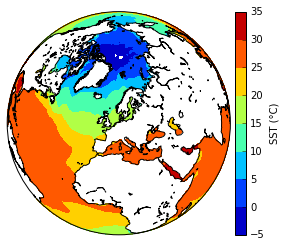

In [67]:
my_map = Basemap(projection='ortho', lat_0=53., lon_0=8.,
                 resolution='c', area_thresh=1000.0)
my_map.drawcoastlines()

x, y = my_map(lons, lats)

my_map.contourf(x, y, sst)
cbar = my_map.colorbar()
cbar.set_label('SST (°C)')

## Exercise

Try out different color settings (i.e., [colormaps](http://matplotlib.org/examples/color/colormaps_reference.html) and number of layers) in your favourite map projection.

**Hint:** Look at the help of the `plt.contourf` function.

# Animations in matplotlib
We will generate an animation (video) of a sine curve, to be rendered inside this notebook.

In [3]:
from IPython.display import HTML
import matplotlib.animation

First we need to set up the figure, the axis, and the plot element we want to animate

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

We need an initialization function to plot the background of each frame

In [9]:
def init():
    line.set_data([], [])
    return (line,)

And an animation function, which is called sequentially.  This function is used to draw each individual frame.  It takes only one parameter, the frame number.

In [10]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

Finally, we can create the animation and display it.

In [ ]:
anim = mpl.animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())

**Hint:** Alternatively, you could save the animation with `anim.save('cosine.mp4')`.

### Exercise
Add the corresponding cosine curve to the animation.  Have the cosine curve becine more transparent with time.

**Hint:** Use the `line2.set_alpha()` method to set the color inside the `animate()` function.

## Animating a map
Creating an animation takes a lot of time.  For example, this simple code to create an animation of rising sea surface temperatures took ~10 minutes on my laptop ...

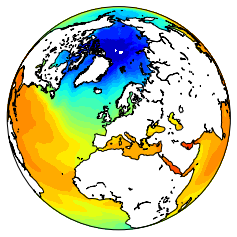

In [107]:
fig, ax = plt.subplots()
my_map = Basemap(projection='ortho', lat_0=53., lon_0=8.,
                 resolution='c', area_thresh=1000.0, ax=ax)
my_map.drawcoastlines()

x, y = my_map(lons, lats)

def animate(i):
    cont = my_map.contourf(x, y, sst + i / 10., 25, vmin=-5, vmax=40)
    return cont, 

anim = mpl.animation.FuncAnimation(fig, animate, 
                               frames=200, interval=40)

HTML(anim.to_html5_video())

## References
- https://basemaptutorial.readthedocs.io/en/latest/
- http://introtopython.org/visualization_earthquakes.html
- http://brandonrose.org/pythonmap
- http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/